/tmp/ipython-input-1-2022407703.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, period="6mo") # Downloading 6 months of data
[*********************100%***********************]  1 of 1 completed


Root Mean Squared Error: 6.889126954774371


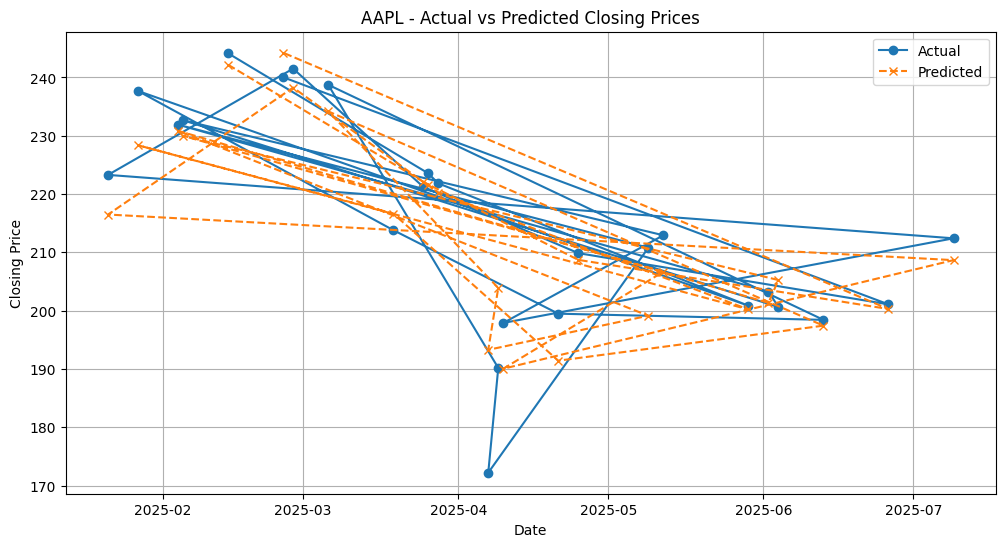

Predicted Closing Price for Next Day: 209.16578549283216


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Fetch Stock Data
stock_symbol = "AAPL"  # Replace with your desired stock symbol
data = yf.download(stock_symbol, period="6mo") # Downloading 6 months of data

# 2. Prepare Data for Modeling
data['Tomorrow'] = data['Close'].shift(-1)  # Create target variable
data = data.dropna() # Remove missing values

# Features (X) and Target (y)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Tomorrow']


# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20 split

# 4. Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Make Predictions
predictions = model.predict(X_test)

# 6. Evaluate Model (Optional)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")

# 7. Plot Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', marker='o', linestyle='-')
plt.plot(y_test.index, predictions, label='Predicted', marker='x', linestyle='--')
plt.title(f'{stock_symbol} - Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# 8. Predict Next Day's Closing Price (Optional)
last_row = data.tail(1)
next_day_features = last_row[['Open', 'High', 'Low', 'Volume']]
next_day_prediction = model.predict(next_day_features)[0]
print(f"Predicted Closing Price for Next Day: {next_day_prediction}")